<a href="https://colab.research.google.com/github/anilsrml/decision-tree-performance-prediction/blob/main/predictionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Yeni Bölüm

# Yeni Bölüm

In [16]:
path = "/content/veriMadenciligi/CEE_DATA.xlsx"
df = pd.read_excel(path)
dfcopy =  df.copy()

In [17]:
df

,Mother_occupation,Gender,Caste,coaching,time,Class_ten_education,twelve_education,medium,Class_ X_Percentage,Class_XII_Percentage,Father_occupation,Performance
0,OTHERS,male,General,NO,ONE,SEBA,AHSEC,ENGLISH,Excellent,Excellent,DOCTOR,Excellent
1,HOUSE_WIFE,male,OBC,WA,TWO,SEBA,AHSEC,OTHERS,Excellent,Excellent,SCHOOL_TEACHER,Excellent
2,HOUSE_WIFE,male,OBC,OA,TWO,OTHERS,CBSE,ENGLISH,Excellent,Excellent,BUSINESS,Excellent
3,SCHOOL_TEACHER,male,General,WA,ONE,SEBA,AHSEC,OTHERS,Excellent,Excellent,SCHOOL_TEACHER,Excellent
4,HOUSE_WIFE,male,General,OA,TWO,SEBA,CBSE,ENGLISH,Excellent,Excellent,COLLEGE_TEACHER,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...
661,HOUSE_WIFE,female,ST,WA,ONE,SEBA,AHSEC,ENGLISH,Good,Vg,OTHERS,Average
662,HOUSE_WIFE,male,ST,WA,THREE,SEBA,AHSEC,ENGLISH,Vg,Good,CULTIVATOR,Average
663,SCHOOL_TEACHER,male,ST,WA,TWO,SEBA,CBSE,ENGLISH,Good,Vg,OTHERS,Average
664,HOUSE_WIFE,male,ST,WA,THREE,SEBA,AHSEC,ENGLISH,Good,Good,SCHOOL_TEACHER,Average


In [18]:
# Veri setinin yapısı
df.info()

# Sayısal sütunlar için temel istatistikler
df.describe()

# Veri setinde eksik veri var mı?
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666 entries, 0 to 665
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Mother_occupation     666 non-null    object
 1   Gender                666 non-null    object
 2   Caste                 666 non-null    object
 3   coaching              666 non-null    object
 4   time                  666 non-null    object
 5   Class_ten_education   666 non-null    object
 6   twelve_education      666 non-null    object
 7   medium                666 non-null    object
 8   Class_ X_Percentage   666 non-null    object
 9   Class_XII_Percentage  666 non-null    object
 10  Father_occupation     666 non-null    object
 11  Performance           666 non-null    object
dtypes: object(12)
memory usage: 62.6+ KB


,0
Mother_occupation,0
Gender,0
Caste,0
coaching,0
time,0
Class_ten_education,0
twelve_education,0
medium,0
Class_ X_Percentage,0
Class_XII_Percentage,0


In [40]:
for sutun in df.columns:
  print(f"\n{sutun} sütunundaki değer çeşitleri")
  for deger in df[sutun].unique():
    print(deger)


Mother_occupation sütunundaki değer çeşitleri
OTHERS
HOUSE_WIFE
SCHOOL_TEACHER
DOCTOR
COLLEGE_TEACHER
BANK_OFFICIAL
BUSINESS
CULTIVATOR
ENGINEER

Gender sütunundaki değer çeşitleri
male
female

Caste sütunundaki değer çeşitleri
General
OBC
SC
ST

coaching sütunundaki değer çeşitleri
NO
WA
OA

time sütunundaki değer çeşitleri
ONE
TWO
THREE
FOUR
FIVE
SEVEN

Class_ten_education sütunundaki değer çeşitleri
SEBA
OTHERS
CBSE

twelve_education sütunundaki değer çeşitleri
AHSEC
CBSE
OTHERS

medium sütunundaki değer çeşitleri
ENGLISH
OTHERS
ASSAMESE

Class_ X_Percentage sütunundaki değer çeşitleri
Excellent
Vg
Good
Average

Class_XII_Percentage sütunundaki değer çeşitleri
Excellent
Vg
Good
Average

Father_occupation sütunundaki değer çeşitleri
DOCTOR
SCHOOL_TEACHER
BUSINESS
COLLEGE_TEACHER
OTHERS
BANK_OFFICIAL
ENGINEER
CULTIVATOR

Performance sütunundaki değer çeşitleri
Excellent
Vg
Good
Average


              precision    recall  f1-score   support

           0       0.87      0.65      0.74        31
           1       0.60      0.22      0.32        27
           2       0.28      0.53      0.37        34
           3       0.46      0.40      0.43        42

    accuracy                           0.46       134
   macro avg       0.55      0.45      0.47       134
weighted avg       0.54      0.46      0.46       134



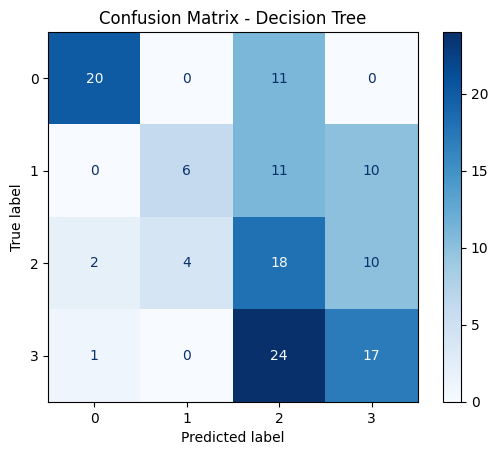

In [43]:
# Hedef değişken
target = 'Performance'

# Label Encoding
label_encoders = {}
for col in df.columns:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

# Özellikler ve hedef
X = df.drop(columns=[target])
y = df[target]

# Train-test ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Karar ağacı modeli
tree_model = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)

# Tahmin ve değerlendirme
y_pred = tree_model.predict(X_test)
print(classification_report(y_test, y_pred))

# Confusion matrix görselleştirme
disp = ConfusionMatrixDisplay.from_estimator(tree_model, X_test, y_test, cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Decision Tree")
plt.show()